# Part of speech tagging

Labeling words in a sentence with their appropriate grammatical categories, such as nouns, verbs, adjectives, or adverbs, is known as part-of-speech 
(POS) tagging. This technique enables us to understand a sentence’s syntactic structure and determine a word’s meaning about other words. For 
instance, in the sentence “The cat sat on the mat,” the words “cat” and “mat” would be tagged as nouns, “sat” as a verb, “the” as a determiner, 
and “on” as a preposition. By assigning each word to a grammatical category, we ensure that we prepare our data for later analysis, such as text 
classification, sentiment analysis, and information retrieval. Here are some common POS tags.

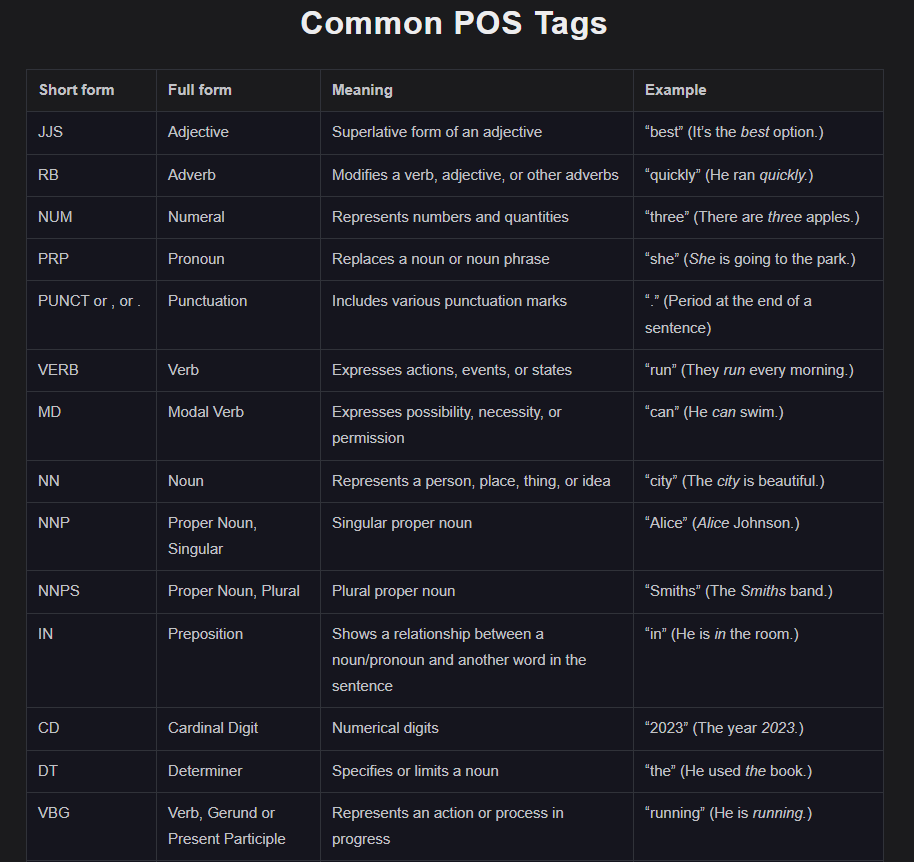


In [1]:
! pip install nltk

In [4]:
# # Import and download the necessary dataset

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)

True

In [5]:

def preprocess_text(text):
  """Preprocesses a text by tokenizing, removing stop words, stemming, and lemmatizing.

  Args:
    text: The input text.

  Returns:
    A list of preprocessed tokens.
  """
    
  # Tokenize the text
  tokens = word_tokenize(text)

  # Remove stop words
  stop_words = set(stopwords.words('english'))
  filtered_tokens = [word for word in tokens if word not in stop_words]

  # Stem the tokens
  stemmer = nltk.PorterStemmer()
  stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

  # Lemmatize the tokens
  lemmatizer = nltk.WordNetLemmatizer()
  lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]

  return lemmatized_tokens


In [6]:
def pos_tag_text(text):
  """Tags the parts of speech of a preprocessed text.

  Args:
    text: The preprocessed text.

  Returns:
    A list of tuples containing the words and their corresponding part-of-speech tags.
  """

  tokens = preprocess_text(text)
  pos_tags = nltk.pos_tag(tokens)
  return pos_tags

In [7]:
# Example 1 : 

paragraph = """The quick brown fox jumps over the lazy dog. The lazy dog, feeling quite put out by the fox's antics, decided to chase the fox away 
from his favorite nap spot. The fox, being the mischievous creature he was, merely laughed and continued to taunt the dog. As the sun began to set, 
the exhausted dog finally gave up the chase and retreated to his cozy den, vowing to get revenge on the pesky fox the next day."""

preprocessed_text = preprocess_text(paragraph)
print(preprocessed_text)
print('='*150)
pos_tags = pos_tag_text(paragraph)

print(pos_tags)

['the', 'quick', 'brown', 'fox', 'jump', 'lazi', 'dog', '.', 'the', 'lazi', 'dog', ',', 'feel', 'quit', 'put', 'fox', "'s", 'antic', ',', 'decid', 'chase', 'fox', 'away', 'favorit', 'nap', 'spot', '.', 'the', 'fox', ',', 'mischiev', 'creatur', ',', 'mere', 'laugh', 'continu', 'taunt', 'dog', '.', 'a', 'sun', 'began', 'set', ',', 'exhaust', 'dog', 'final', 'gave', 'chase', 'retreat', 'cozi', 'den', ',', 'vow', 'get', 'reveng', 'peski', 'fox', 'next', 'day', '.']
[('the', 'DT'), ('quick', 'JJ'), ('brown', 'NN'), ('fox', 'JJ'), ('jump', 'NN'), ('lazi', 'NN'), ('dog', 'NN'), ('.', '.'), ('the', 'DT'), ('lazi', 'JJ'), ('dog', 'NN'), (',', ','), ('feel', 'VB'), ('quit', 'NN'), ('put', 'VBD'), ('fox', 'NN'), ("'s", 'POS'), ('antic', 'JJ'), (',', ','), ('decid', 'JJ'), ('chase', 'NN'), ('fox', 'VB'), ('away', 'RB'), ('favorit', 'JJ'), ('nap', 'JJ'), ('spot', 'NN'), ('.', '.'), ('the', 'DT'), ('fox', 'NN'), (',', ','), ('mischiev', 'NN'), ('creatur', 'NN'), (',', ','), ('mere', 'RB'), ('laugh',

In [ ]:
# Example 2 - Consider a review dataset

In [10]:
! pip install contractions

   ---------------------------------------- 0.0/289.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/289.9 kB ? eta -:--:--
   -------------- ------------------------- 102.4/289.9 kB 1.2 MB/s eta 0:00:01
   --------------------- ------------------ 153.6/289.9 kB 1.0 MB/s eta 0:00:01
   --------------------------------- ------ 245.8/289.9 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 289.9/289.9 kB 1.4 MB/s eta 0:00:00


In [11]:
# a. Import necessary libraries and download data

import pandas as pd
import nltk
import string
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger', quiet=True)

True

In [16]:
# b.read the review dataset
# customers reviewed a software application

df = pd.read_csv('C:/Users/ariji/OneDrive/Desktop/Data/reviews.csv')
pd.set_option('display.max_colwidth', 300)
df.head()

,review_id,text
0,txt145,"The software had a steep learning curve at first, but after a while, I started to appreciate its powerful features."
1,txt327,I'm really impressed with the user interface of the software. It's intuitive and easy to navigate.
2,txt209,The latest update to the software fixed several bugs and improved its overall performance.
3,txt825,"I encountered a few glitches while using the software, but the customer support was quick to help me resolve them."
4,txt878,"I was skeptical about trying the software initially, but it turned out to be a game-changer for our productivity."


In [17]:
# c. Expand contractions in the text

"""“Expand_contractions” typically refers to a process or function in text preprocessing that converts contracted forms of words into their full forms.
For example, it would transform “don’t” into “do not”."""

def expand_contractions(text):
    return contractions.fix(text)

df['text'] = df['text'].apply(expand_contractions)
df.head()

,review_id,text
0,txt145,"The software had a steep learning curve at first, but after a while, I started to appreciate its powerful features."
1,txt327,I am really impressed with the user interface of the software. It is intuitive and easy to navigate.
2,txt209,The latest update to the software fixed several bugs and improved its overall performance.
3,txt825,"I encountered a few glitches while using the software, but the customer support was quick to help me resolve them."
4,txt878,"I was skeptical about trying the software initially, but it turned out to be a game-changer for our productivity."


In [18]:
# d. tokenize and convert to lower case and store in a different column

df['tokens'] = df['text'].apply(lambda text: word_tokenize(text.lower()))
df.head()

,review_id,text,tokens
0,txt145,"The software had a steep learning curve at first, but after a while, I started to appreciate its powerful features.","[the, software, had, a, steep, learning, curve, at, first, ,, but, after, a, while, ,, i, started, to, appreciate, its, powerful, features, .]"
1,txt327,I am really impressed with the user interface of the software. It is intuitive and easy to navigate.,"[i, am, really, impressed, with, the, user, interface, of, the, software, ., it, is, intuitive, and, easy, to, navigate, .]"
2,txt209,The latest update to the software fixed several bugs and improved its overall performance.,"[the, latest, update, to, the, software, fixed, several, bugs, and, improved, its, overall, performance, .]"
3,txt825,"I encountered a few glitches while using the software, but the customer support was quick to help me resolve them.","[i, encountered, a, few, glitches, while, using, the, software, ,, but, the, customer, support, was, quick, to, help, me, resolve, them, .]"
4,txt878,"I was skeptical about trying the software initially, but it turned out to be a game-changer for our productivity.","[i, was, skeptical, about, trying, the, software, initially, ,, but, it, turned, out, to, be, a, game-changer, for, our, productivity, .]"


In [19]:
# e. remove stopwords from the tokens and store it in the same column

stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda tokens: [token for token in tokens if token not in stop_words])
df.head()

,review_id,text,tokens
0,txt145,"The software had a steep learning curve at first, but after a while, I started to appreciate its powerful features.","[software, steep, learning, curve, first, ,, ,, started, appreciate, powerful, features, .]"
1,txt327,I am really impressed with the user interface of the software. It is intuitive and easy to navigate.,"[really, impressed, user, interface, software, ., intuitive, easy, navigate, .]"
2,txt209,The latest update to the software fixed several bugs and improved its overall performance.,"[latest, update, software, fixed, several, bugs, improved, overall, performance, .]"
3,txt825,"I encountered a few glitches while using the software, but the customer support was quick to help me resolve them.","[encountered, glitches, using, software, ,, customer, support, quick, help, resolve, .]"
4,txt878,"I was skeptical about trying the software initially, but it turned out to be a game-changer for our productivity.","[skeptical, trying, software, initially, ,, turned, game-changer, productivity, .]"


In [20]:
# f. apply part of speech tagging to the tokens column

df['pos_tags'] = df['tokens'].apply(nltk.pos_tag)
print(df.head())

  review_id  \
0    txt145   
1    txt327   
2    txt209   
3    txt825   
4    txt878   

                                                                                                                  text  \
0  The software had a steep learning curve at first, but after a while, I started to appreciate its powerful features.   
1                 I am really impressed with the user interface of the software. It is intuitive and easy to navigate.   
2                           The latest update to the software fixed several bugs and improved its overall performance.   
3   I encountered a few glitches while using the software, but the customer support was quick to help me resolve them.   
4    I was skeptical about trying the software initially, but it turned out to be a game-changer for our productivity.   

                                                                                        tokens  \
0  [software, steep, learning, curve, first, ,, ,, started, appreciate, powerf

In [ ]:
# example 3 : consider a feedback dataset

In [21]:
# a.import necessary libraries

import pandas as pd
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger', quiet=True)

True

In [22]:
# b.read the feedback dataset


df = pd.read_csv('C:/Users/ariji/OneDrive/Desktop/Data/feedback.csv')
pd.set_option('display.max_colwidth', 300)
df.head()

,timestamp,username,feedback,sentiment
0,08-08-2023 10:00,@TechEnthusiast,The new telecom product offers amazing connectivity and lightning-fast speeds. I'm thoroughly impressed!,positive
1,08-08-2023 10:15,@GadgetGuru,The new telecom product is a game-changer! It's made my online gaming experience so much smoother and lag-free.,positive
2,08-08-2023 10:30,@FrequentCaller,I've noticed a significant improvement in call quality and signal strength with the new telecom product. Great job!,positive
3,08-08-2023 10:45,@BusinessOwner,The new product has enhanced our business operations by providing reliable internet for all our devices. A must-have for any office.,positive
4,08-08-2023 11:00,@DigitalNomad,"As a digital nomad, I rely on consistent internet wherever I go. The new telecom product has kept me connected no matter where I am!",positive


In [23]:
# c. Expand contractions in the text

"""“Expand_contractions” typically refers to a process or function in text preprocessing that converts contracted forms of words into their full forms.
For example, it would transform “don’t” into “do not”."""

def expand_contractions(text):
    return contractions.fix(text)

df['feedback'] = df['feedback'].apply(expand_contractions)
df.head()

,timestamp,username,feedback,sentiment
0,08-08-2023 10:00,@TechEnthusiast,The new telecom product offers amazing connectivity and lightning-fast speeds. I am thoroughly impressed!,positive
1,08-08-2023 10:15,@GadgetGuru,The new telecom product is a game-changer! It is made my online gaming experience so much smoother and lag-free.,positive
2,08-08-2023 10:30,@FrequentCaller,I have noticed a significant improvement in call quality and signal strength with the new telecom product. Great job!,positive
3,08-08-2023 10:45,@BusinessOwner,The new product has enhanced our business operations by providing reliable internet for all our devices. A must-have for any office.,positive
4,08-08-2023 11:00,@DigitalNomad,"As a digital nomad, I rely on consistent internet wherever I go. The new telecom product has kept me connected no matter where I am!",positive


In [29]:
# d. tokenize and convert to lower case and store in a different column

df['tokens'] = df['feedback'].apply(lambda text: word_tokenize(text.lower()))
df.head()


,timestamp,username,feedback,sentiment,tokens
0,08-08-2023 10:00,@TechEnthusiast,The new telecom product offers amazing connectivity and lightning-fast speeds. I am thoroughly impressed!,positive,"[the, new, telecom, product, offers, amazing, connectivity, and, lightning-fast, speeds, ., i, am, thoroughly, impressed, !]"
1,08-08-2023 10:15,@GadgetGuru,The new telecom product is a game-changer! It is made my online gaming experience so much smoother and lag-free.,positive,"[the, new, telecom, product, is, a, game-changer, !, it, is, made, my, online, gaming, experience, so, much, smoother, and, lag-free, .]"
2,08-08-2023 10:30,@FrequentCaller,I have noticed a significant improvement in call quality and signal strength with the new telecom product. Great job!,positive,"[i, have, noticed, a, significant, improvement, in, call, quality, and, signal, strength, with, the, new, telecom, product, ., great, job, !]"
3,08-08-2023 10:45,@BusinessOwner,The new product has enhanced our business operations by providing reliable internet for all our devices. A must-have for any office.,positive,"[the, new, product, has, enhanced, our, business, operations, by, providing, reliable, internet, for, all, our, devices, ., a, must-have, for, any, office, .]"
4,08-08-2023 11:00,@DigitalNomad,"As a digital nomad, I rely on consistent internet wherever I go. The new telecom product has kept me connected no matter where I am!",positive,"[as, a, digital, nomad, ,, i, rely, on, consistent, internet, wherever, i, go, ., the, new, telecom, product, has, kept, me, connected, no, matter, where, i, am, !]"


In [31]:
# e. remove stopwords and punctuations from the tokens and store it in the same column

stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda tokens: [token for token in tokens if token not in stop_words])
df['tokens'] = df['tokens'].apply(lambda tokens: [token for token in tokens if token not in string.punctuation])
df.head()

,timestamp,username,feedback,sentiment,tokens
0,08-08-2023 10:00,@TechEnthusiast,The new telecom product offers amazing connectivity and lightning-fast speeds. I am thoroughly impressed!,positive,"[new, telecom, product, offers, amazing, connectivity, lightning-fast, speeds, thoroughly, impressed]"
1,08-08-2023 10:15,@GadgetGuru,The new telecom product is a game-changer! It is made my online gaming experience so much smoother and lag-free.,positive,"[new, telecom, product, game-changer, made, online, gaming, experience, much, smoother, lag-free]"
2,08-08-2023 10:30,@FrequentCaller,I have noticed a significant improvement in call quality and signal strength with the new telecom product. Great job!,positive,"[noticed, significant, improvement, call, quality, signal, strength, new, telecom, product, great, job]"
3,08-08-2023 10:45,@BusinessOwner,The new product has enhanced our business operations by providing reliable internet for all our devices. A must-have for any office.,positive,"[new, product, enhanced, business, operations, providing, reliable, internet, devices, must-have, office]"
4,08-08-2023 11:00,@DigitalNomad,"As a digital nomad, I rely on consistent internet wherever I go. The new telecom product has kept me connected no matter where I am!",positive,"[digital, nomad, rely, consistent, internet, wherever, go, new, telecom, product, kept, connected, matter]"


In [32]:
# f. apply part of speech tagging to the tokens column

df['pos_tags'] = df['tokens'].apply(nltk.pos_tag)
print(df.head())

          timestamp         username  \
0  08-08-2023 10:00  @TechEnthusiast   
1  08-08-2023 10:15      @GadgetGuru   
2  08-08-2023 10:30  @FrequentCaller   
3  08-08-2023 10:45   @BusinessOwner   
4  08-08-2023 11:00    @DigitalNomad   

                                                                                                                               feedback  \
0                             The new telecom product offers amazing connectivity and lightning-fast speeds. I am thoroughly impressed!   
1                      The new telecom product is a game-changer! It is made my online gaming experience so much smoother and lag-free.   
2                 I have noticed a significant improvement in call quality and signal strength with the new telecom product. Great job!   
3  The new product has enhanced our business operations by providing reliable internet for all our devices. A must-have for any office.   
4  As a digital nomad, I rely on consistent internet wherever I 

# limitations : 

While POS tagging provides benefits and advantages, there are some limitations to take into account:

Some words can have numerous possible parts of speech depending on the context in which they’re spoken, which presents a difficulty for POS labeling.
For example, the word “run” can be used as a noun or a verb (as in, “I like to run” or “I went for a run”). Similarly, the word “fast” can function
as an adjective or an adverb (as in, “She is a fast runner” or “He ran fast”) while the word “present” can be a noun or a verb 
(as in, “I received a present” or “She will present the findings”).

Additionally, POS tagging might be more challenging in some languages due to their more complicated grammatical structures.

We can resort to advanced techniques such as contextual and machine-learning-based POS tagging to resolve these challenges. Contextual POS tagging 
can make more accurate predictions about the part of speech of a word by considering the surrounding words and the overall context. On the other
hand, machine learning-based POS tagging can use algorithms trained on large datasets to identify patterns and make informed decisions about the
appropriate part of speech, even in languages with complex grammatical structures.

